In [48]:
import json, sys, time
import pandas as pd 
import pickle 

# ML tasks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron

In [49]:
from load import stream_bulks, data_full, BULK_SIZE
from pm_processing import describe_model

In [50]:
values = []
for i, json_dicts in enumerate(stream_bulks(data_full, BULK_SIZE)):
    if i % 100 ==0 : 
        print(i)
    if i > 500:
        break
    if i == 0:
        model = Perceptron()
 
    df = pd.DataFrame(json.loads(json_dicts))
    dataset = df[['competence','network_ability','promoted']] # skip id
    X_vals = dataset.iloc[:, :-1].values
    y_vals = dataset.iloc[:, -1].values

    # if not first model, test with the same data
    if i != 0:

        test_start = time.time()
        values[-1]['accuracy'] = model.score(X_vals, y_vals)
        values[-1]['test_time'] = time.time() - test_start
        values[-1]['test_pos'] = int(sum(y_vals))

    # train model 
    values.append({})
    
    train_start = time.time()
    model.partial_fit(X_vals, y_vals, classes=[0,1])
    values[-1]['train_time'] = time.time() - train_start
    values[-1]['train_pos'] = int(sum(y_vals))

    # extract parameters
    model_description = describe_model(
        'model',model,dataset.iloc[:, :-1],None
    )
    values[-1] = {**values[-1],**model_description}
    # store model
    previous_pickle = pickle.dumps(model)

0
100
200
300
400
500


In [51]:
df_validation = pd.DataFrame(values)

<AxesSubplot:xlabel='index'>

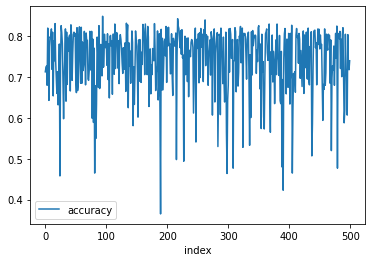

In [52]:
df_validation.reset_index().plot(x='index', y='accuracy')